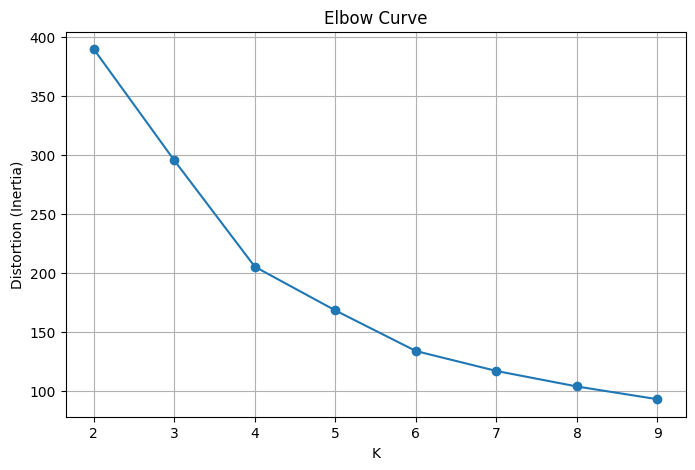

Silhouette Scores:
K = 2 → Silhouette Score = 0.335
K = 3 → Silhouette Score = 0.358
K = 4 → Silhouette Score = 0.404
K = 5 → Silhouette Score = 0.417
K = 6 → Silhouette Score = 0.428
K = 7 → Silhouette Score = 0.417
K = 8 → Silhouette Score = 0.408
K = 9 → Silhouette Score = 0.418


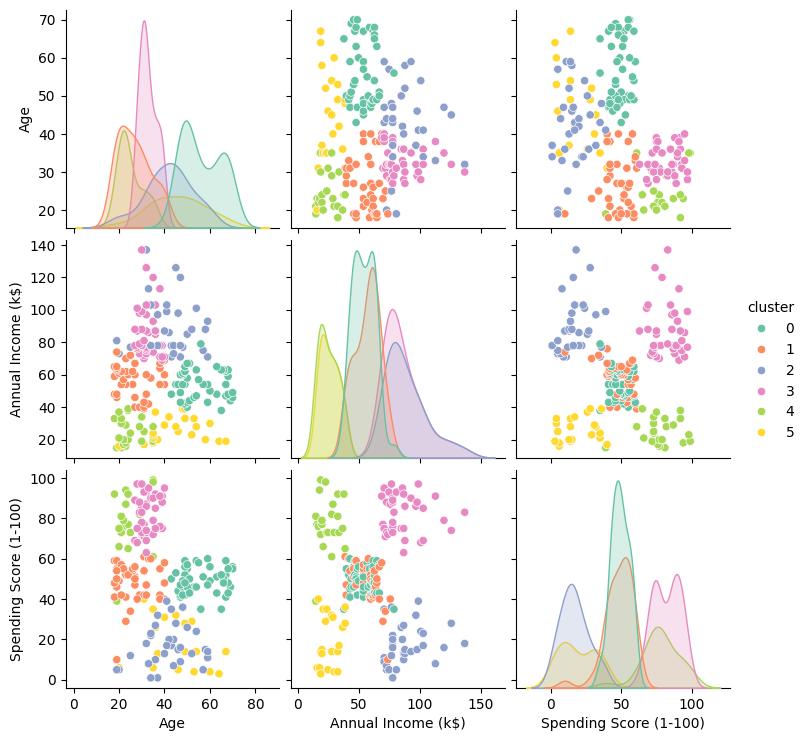

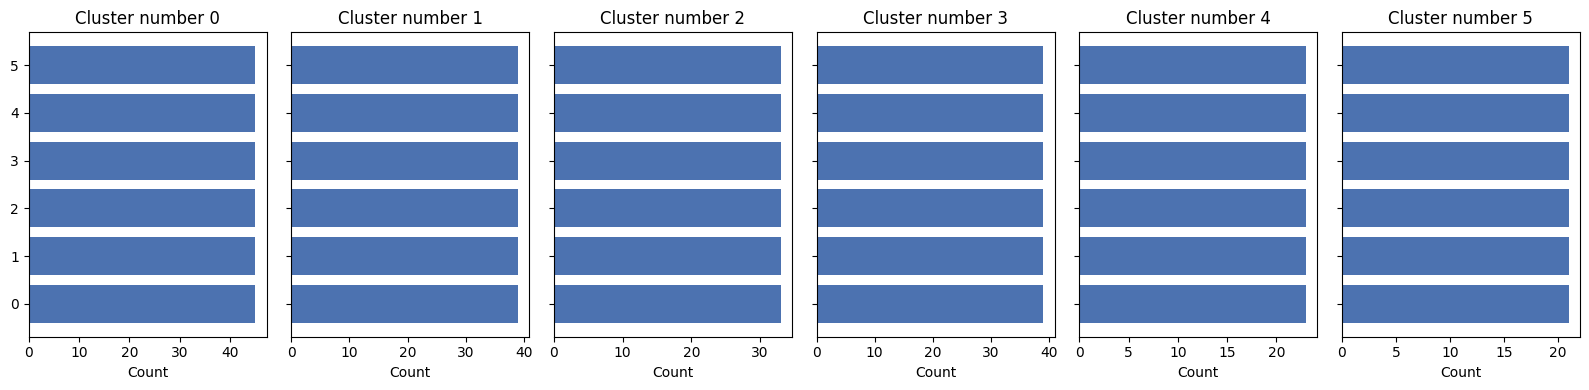

In [2]:
# =========================================================
# Customer Segmentation using K-Means & Hierarchical Clustering
# =========================================================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ---------------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------------
df = pd.read_csv("ML470_S7_MallCustomers_Data_Concept.csv")

# Select features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# ---------------------------------------------------------
# 3. Feature Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------
# 4. ELBOW METHOD (K = 2 to 10)
# ---------------------------------------------------------
distortions = []

K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title("Elbow Curve")
plt.xlabel("K")
plt.ylabel("Distortion (Inertia)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 5. SILHOUETTE SCORE
# ---------------------------------------------------------
print("Silhouette Scores:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K = {k} → Silhouette Score = {score:.3f}")

# ---------------------------------------------------------
# 6. K-MEANS CLUSTERING (Optimal K = 6 used here)
# ---------------------------------------------------------
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# ---------------------------------------------------------
# 7. PAIRPLOT (Cluster Visualization)
# ---------------------------------------------------------
sns.pairplot(
    df,
    vars=features,
    hue='cluster',
    diag_kind='kde',
    palette='Set2'
)
plt.show()

# ---------------------------------------------------------
# 8. CLUSTER-WISE CUSTOMER COUNT (BAR CHARTS)
# ---------------------------------------------------------
cluster_counts = df['cluster'].value_counts().sort_index()

fig, axes = plt.subplots(1, len(cluster_counts), figsize=(16, 4), sharey=True)

for i, ax in enumerate(axes):
    ax.barh(
        y=cluster_counts.index,
        width=[cluster_counts.iloc[i]],
        color='#4C72B0'
    )
    ax.set_title(f"Cluster number {i}")
    ax.set_xlabel("Count")

plt.tight_layout()
plt.show()